# Ex2

Utilizando as funções desenvolvidas, implemente as seguintes aplicações:
1. Extração de Bordas
2. Esqueleto

Aplique o código desenvolvido em imagens do dataset MPEG-7.
http://www.cis.temple.edu/~latecki/TestData/mpeg7shapeB.tar.gz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# show image 1 and image 2
def show_img(img1, img2):
  fig = plt.figure()
  fig.set_figheight(10)
  fig.set_figwidth(10)

  fig.add_subplot(1,2,1)
  plt.imshow(img1, cmap='gray')

  # display the new image
  fig.add_subplot(1,2,2)
  plt.imshow(img2, cmap='gray')

  plt.show(block=True)

In [4]:
def idx_check(index):
    return 0 if index < 0 else index

In [5]:
# image erosion
def erosion(img, element):
    img = np.asarray(img)
    element = np.asarray(element)
    m, n = img.shape
    m_el, n_el = element.shape
    m_eo, n_eo = (int(np.ceil((m_el - 1) / 2.0)), int(np.ceil((n_el - 1) / 2.0)))
    img_n = np.zeros([m, n])

    for i in range(m):
        for j in range(n):
            overlap = img[idx_check(i - m_eo):i + (m_el - m_eo),
                          idx_check(j - n_eo):j + (n_el - n_eo)]
            m_s, n_s = overlap.shape

            e_first_m_idx = int(np.fabs(i - m_eo)) if i - m_eo < 0 else 0
            e_first_n_idx = int(np.fabs(j - n_eo)) if j - n_eo < 0 else 0
            e_last_m_idx = m_el - 1 - (i + (m_el - m_eo) - m) if i + (m_el - m_eo) > m else m_el - 1
            e_last_n_idx = n_el - 1 - (j + (n_el - n_eo) - n) if j + (n_el - n_eo) > n else n_el - 1

            if m_s != 0 and n_s != 0 and np.array_equal(np.logical_and(overlap, 
                                                                       element[e_first_m_idx:e_last_m_idx+1, e_first_n_idx:e_last_n_idx+1]), 
                                                                       element[e_first_m_idx:e_last_m_idx+1, e_first_n_idx:e_last_n_idx+1]):
                img_n[i, j] = 255

    return img_n.astype(np.uint8)

In [6]:
# image dilation
def dilation(img, element):
    img = np.asarray(img)
    element = np.asarray(element)
    m, n = img.shape
    m_el, n_el = element.shape
    m_eo, n_eo = (int(np.ceil((m_el - 1) / 2.0)), int(np.ceil((n_el - 1) / 2.0)))
    img_n = np.zeros([m, n])

    for i in range(m):
        for j in range(n):
            overlap = img[idx_check(i - m_eo):i + (m_el - m_eo),
                          idx_check(j - n_eo):j + (n_el - n_eo)]
            m_s, n_s = overlap.shape

            e_first_m_idx = int(np.fabs(i - m_eo)) if i - m_eo < 0 else 0
            e_first_n_idx = int(np.fabs(j - n_eo)) if j - n_eo < 0 else 0
            e_last_m_idx = m_el - 1 - (i + (m_el - m_eo) - m) if i + (m_el - m_eo) > m else m_el - 1
            e_last_n_idx = n_el - 1 - (j + (n_el - n_eo) - n) if j + (n_el - n_eo) > n else n_el - 1

            if m_s != 0 and n_s != 0 and np.logical_and(element[e_first_m_idx:e_last_m_idx+1, e_first_n_idx:e_last_n_idx+1], overlap).any():
                img_n[i, j] = 255

    return img_n.astype(np.uint8)

In [7]:
# image opening operation
def opening(img, element):
  img_e = erosion(img, element)
  img_d = dilation(img_e, element)
  return img_d.astype(np.uint8)

In [8]:
# image closing operation
def closing(img, element):
  img_d = dilation(img, element)
  img_e = erosion(img_d, element)
  return img_e.astype(np.uint8)

In [15]:
# extract a border from an image
def border_extract(img, element):
  img = np.asarray(img)
  
  img_e = erosion(img, element)
  img_s = np.subtract(img, img_e)

  return img_s.astype(np.uint8)

In [10]:
def skeleton(img, element):
  img = np.asarray(img)
  skel = np.zeros(img.shape, np.uint8)

  while True:
      open = opening(img, element)
      temp = np.subtract(img, open)
      eroded = erosion(img, element)
      skel = np.add(skel, temp)
      img = eroded.copy()
      if np.count_nonzero(img) == 0:
          break

  return skel.astype(np.uint8)

In [38]:
# element for erosion or dilation
element = np.asarray([[1,1,1],
                      [1,1,1],
                      [1,1,1]])

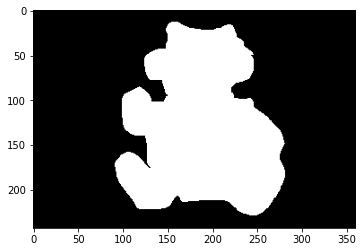

In [12]:
# get test image
image_aux = Image.open('/content/drive/MyDrive/datasets/pid/teddy-01.gif')
image1 = np.asarray(image_aux)
plt.imshow(image1, cmap='gray')

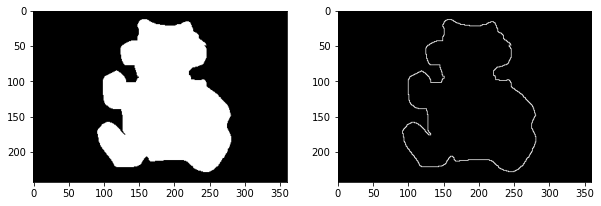

In [16]:
# extract image border
image1b = border_extract(image1, element)
show_img(image1, image1b)

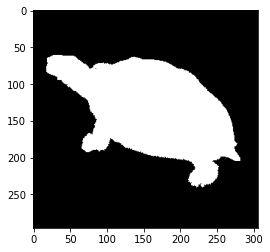

In [36]:
# get test image
image_aux = Image.open('/content/drive/MyDrive/datasets/pid/turtle-1.gif')
image2 = np.asarray(image_aux)
plt.imshow(image2, cmap='gray')

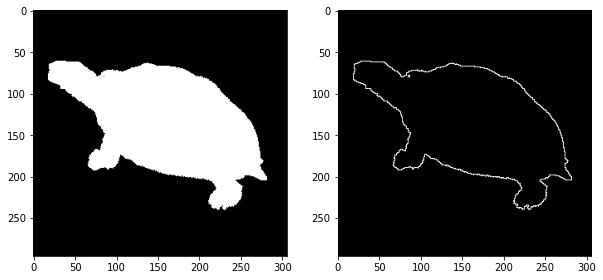

In [39]:
# extract image border
image2b = border_extract(image2, element)
show_img(image2, image2b)

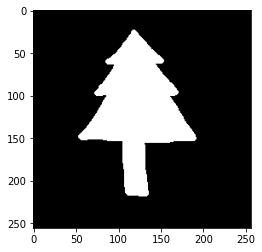

In [108]:
# get test image
image_aux = Image.open('/content/drive/MyDrive/datasets/pid/tree-1.gif')
image3 = np.asarray(image_aux)
plt.imshow(image3, cmap='gray')

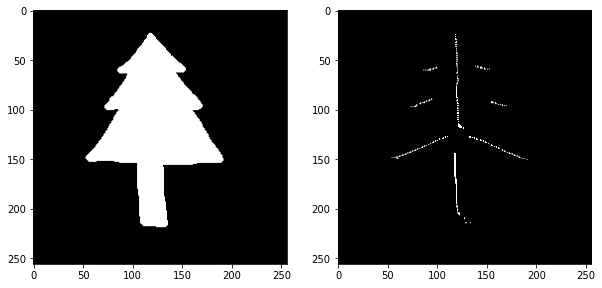

In [111]:
# extract image skeleton
image3s = skeleton(image3, element)
show_img(image3, image3s)